In [1]:
import pandas as pd
import seaborn as sns

star = pd.read_excel('star.xlsx')
star.head()

,id,tmathssk,treadssk,classk,totexpk,sex,freelunk,race,schidkn
0,1,473,447,small.class,7,girl,no,white,63
1,2,536,450,small.class,21,girl,no,black,20
2,3,463,439,regular.with.aide,0,boy,yes,black,19
3,4,559,448,regular,16,boy,no,white,69
4,5,489,447,small.class,5,boy,yes,white,79


In [2]:
math_scores = star['tmathssk']
type(math_scores)

pandas.core.series.Series

In [3]:
math_scores = star[['tmathssk']]
type(math_scores)

pandas.core.frame.DataFrame

In [4]:
star = star[['tmathssk','treadssk','classk','totexpk','schidkn']]
star.columns

Index(['tmathssk', 'treadssk', 'classk', 'totexpk', 'schidkn'], dtype='object')

In [5]:
star = star.drop('schidkn',axis=1)
star.columns

Index(['tmathssk', 'treadssk', 'classk', 'totexpk'], dtype='object')

In [6]:
star['ttl_score'] = star['tmathssk']+star['treadssk']
star['new_column'] = star['totexpk']*12
print(star.head())

   tmathssk  treadssk             classk  totexpk  ttl_score  new_column
0       473       447        small.class        7        920          84
1       536       450        small.class       21        986         252
2       463       439  regular.with.aide        0        902           0
3       559       448            regular       16       1007         192
4       489       447        small.class        5        936          60


In [7]:
star = star.rename(columns = {'new_column':'months_exp'})
star.columns

Index(['tmathssk', 'treadssk', 'classk', 'totexpk', 'ttl_score', 'months_exp'], dtype='object')

In [8]:
# Sort our DataFrame by math score, print first few rows
print(star.sort_values(by='tmathssk').head())

      tmathssk  treadssk             classk  totexpk  ttl_score  months_exp
1470       320       315            regular        3        635          36
309        320       360            regular        6        680          72
2326       339       388            regular        6        727          72
4401       339       380  regular.with.aide       11        719         132
5614       339       390  regular.with.aide       11        729         132


In [9]:
# Sort by class type, descending
print(star.sort_values(by='classk',ascending=False).head())

      tmathssk  treadssk       classk  totexpk  ttl_score  months_exp
0          473       447  small.class        7        920          84
2860       459       428  small.class       14        887         168
2869       500       440  small.class       18        940         216
1          536       450  small.class       21        986         252
2879       468       443  small.class        2        911          24


In [10]:
# Sort by class size ascending and math score descending
print(star.sort_values(by=['classk','tmathssk'], ascending=[True,False]).head())

      tmathssk  treadssk   classk  totexpk  ttl_score  months_exp
724        626       474  regular       15       1100         180
1466       626       554  regular       11       1180         132
1634       626       580  regular       15       1206         180
2476       626       538  regular       20       1164         240
2495       626       522  regular        7       1148          84


In [11]:
small_class = star['classk']=='small.class'
small_class.head()

0     True
1     True
2    False
3    False
4     True
Name: classk, dtype: bool

We can now filter our DataFrame by passing this series of `True`/`False` flags into it with brackets `[]`: 

In [12]:
star_filtered = star[small_class]

print(star.shape)
print(star_filtered.shape)

(5748, 6)
(1733, 6)


In [13]:
star_filtered = star[star['treadssk']>=500]

print(star.shape)
print(star_filtered.shape)

(5748, 6)
(233, 6)


In [14]:
star[(star['treadssk']>=500) & (star['classk']=='small.class')]
star_filtered.shape

(233, 6)

In [15]:
star_grouped = star.groupby('classk')
star_grouped

In [16]:
print(star.groupby('totexpk')[['ttl_score']].max().head())

         ttl_score
totexpk           
0             1171
1             1133
2             1091
3             1203
4             1229


In [17]:
star = pd.read_excel('star.xlsx')
districts = pd.read_excel('district-names.xlsx')
star.merge(districts,how='left').head()

,id,tmathssk,treadssk,classk,totexpk,sex,freelunk,race,schidkn,school_name,county
0,1,473,447,small.class,7,girl,no,white,63,Ridgeville,New Liberty
1,2,536,450,small.class,21,girl,no,black,20,South Heights,Selmont
2,3,463,439,regular.with.aide,0,boy,yes,black,19,Bunnlevel,Sattley
3,4,559,448,regular,16,boy,no,white,69,Hokah,Gallipolis
4,5,489,447,small.class,5,boy,yes,white,79,Lake Mathews,Sugar Mountain


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In C:\Users\User\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\User\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\User\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


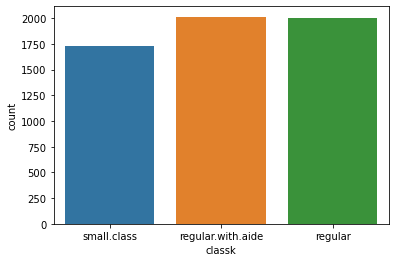

In [27]:
sns.countplot(x='classk',data=star)

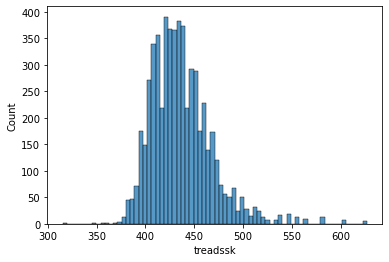

In [23]:
sns.histplot(x='treadssk',data=star)

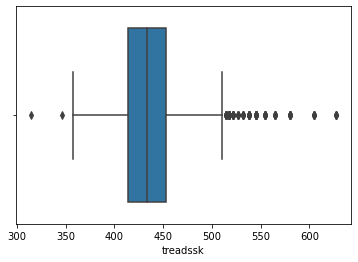

In [26]:
sns.boxplot(x='treadssk',data=star)

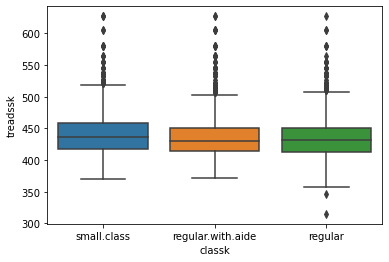

In [50]:
sns.boxplot(x='classk',y='treadssk',data=star)

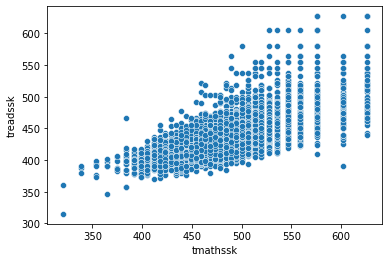

In [51]:
sns.scatterplot(x='tmathssk',y='treadssk',data=star)

Let's do a few things:

1. Add a custom x-axis label with `xlabel()`.
2. Add a custom y-axis label with `ylabel()`.
3. Add a custom plot title with `title()`.

Text(0.5, 1.0, 'Relationship between total math and reading scaled scores')

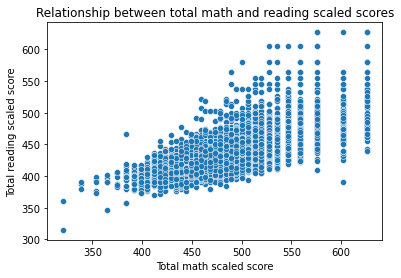

In [52]:
sns.scatterplot(x='tmathssk',y='treadssk',data=star)
plt.xlabel('Total math scaled score')
plt.ylabel('Total reading scaled score')
plt.title('Relationship between total math and reading scaled scores')